In [1]:
import numpy as np
import pandas as pd
import math
import itertools
from sklearn.metrics import DistanceMetric
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist
import networkx as nx
from numpy import inf
import random
from scipy import linalg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist #Calculates pairwise distance

In [22]:
'equation for adjacency'

def equation(df, sigma, distance):
    dim = df.shape[0]
  
    A = np.zeros([dim, dim])
   
    dist = iter(pdist(df, metric=distance))
    pd = pdist(df, metric=distance)
    print('distance:',pd)
#     matrix_dist = dist.pairwise(df.to_numpy())
    for i in range(dim):
       
        for j in range(i+1, dim):  

            d = np.exp(-next(dist) ** 2) / (2. * sigma ** 2)
            
            
            A[i,j] = d
            A[j,i] = d
            A[i,i] = 0
            A[j,j] = 0
    
    return A

In [15]:
def CSVToGraphAndAdjecency(csv) :
    
    # Uploading the file
    file=open(csv)
    df = pd.read_csv(file)
    df_cluster = df.iloc[:,0:13]
    
    # Original dataset
    print('original dataset:')
    print(df_cluster.head())
    
 
    
    # Creating a distance matrix and Graph
    dist = DistanceMetric.get_metric('euclidean')
    matrix_dist = dist.pairwise(df_cluster.to_numpy())
    Graph=nx.from_numpy_matrix(matrix_dist)
    draw_graph(Graph)
    
    # Distance matrix
    print('distance matrix:')
    print(matrix_dist)
    
    # Creating an adjecency matrix
    adjacency_matrix = equation(df_cluster, 0.3, 'euclidean')
    
    # Adjacency matrix
    print('adjacency matrix:')
    print(adjacency_matrix)
    
    return df, df_cluster, matrix_dist, adjacency_matrix, Graph

In [16]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

original dataset:
   ID   age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   1  75.0        0                       582         0                 20   
1   2  55.0        0                      7861         0                 38   
2   3  65.0        0                       146         0                 20   
3   4  50.0        1                       111         0                 20   
4   5  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2    

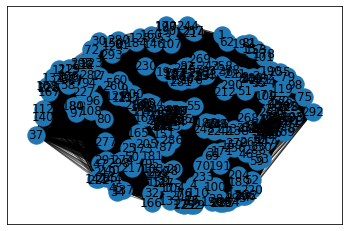

In [23]:
csv="HeartFailure.csv"
df, df_cluster, matrix_dist, adjacency_matrix, Graph = CSVToGraphAndAdjecency(csv)